# Building ANN using PyTorch

### Importing the dataset

In [30]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import torch 
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn 
import torch.optim as optim
import matplotlib.pyplot as plt 
from torchinfo import summary
## Setting random seed for reproducibility 
torch.manual_seed(42)

In [7]:
df = pd.read_csv(r"datasets/fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


### Showing some sample images

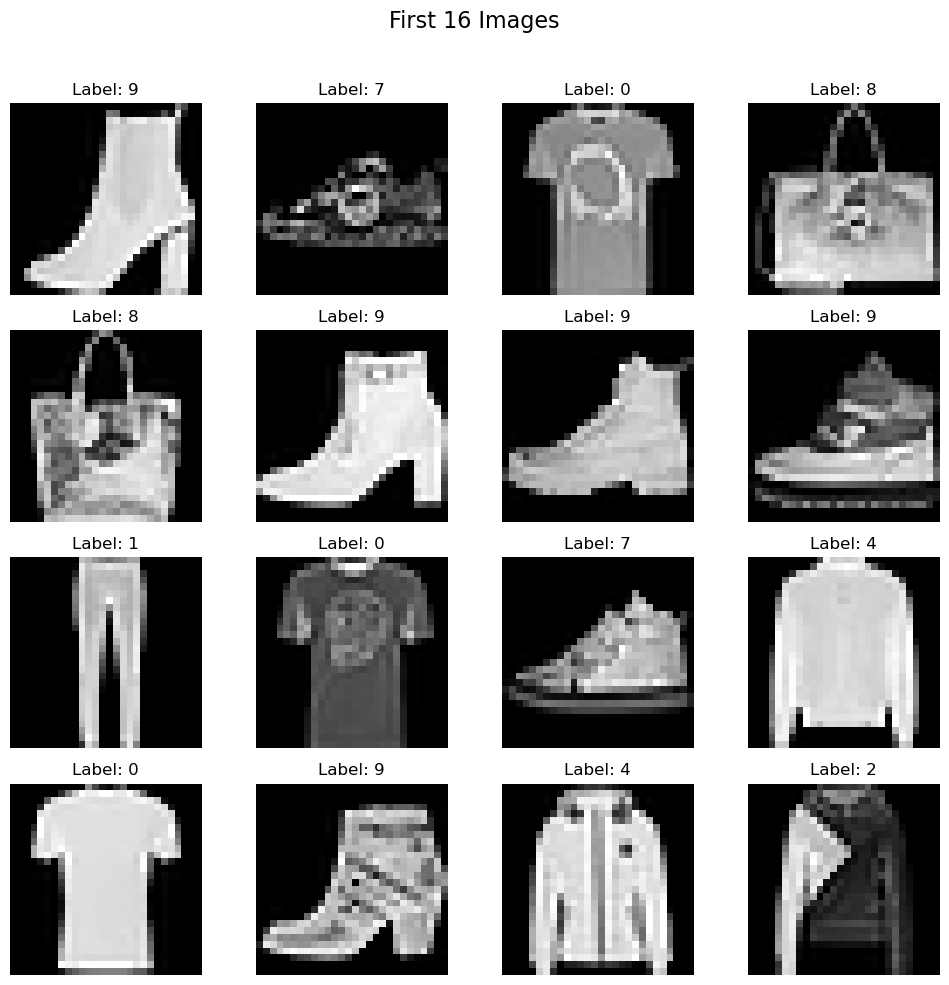

In [9]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img, cmap = 'grey')  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


### Feature and label extraction

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

### Train test split of the data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling the features

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

### Creating a custom dataset class

In [14]:
class CustomDataset(Dataset):
    
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype = torch.float32)
        self.labels = torch.tensor(labels, dtype = torch.long)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [18]:
## Creating train_dataset object
train_dataset = CustomDataset(X_train, y_train)

## creating test dataset object 
test_dataset = CustomDataset(X_test, y_test)

### Creating train and test loader

In [19]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### Creating the neural network

In [24]:
class MyNN(nn.Module):
    
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    ## we don't explicitly add the softmax layer at last as in pytorch the cross entropy loss automatically adds that
    
    def forward(self,x):
        return self.model(x)

In [25]:
epochs = 100
lr = 0.1

In [31]:
model = MyNN(X_train.shape[1])

print(summary(model))

## loss function
criterion = nn.CrossEntropyLoss()

## Optimizer 
optimizer = optim.SGD(model.parameters(), lr = lr)

Layer (type:depth-idx)                   Param #
MyNN                                     --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       100,480
│    └─ReLU: 2-2                         --
│    └─Linear: 2-3                       8,256
│    └─ReLU: 2-4                         --
│    └─Linear: 2-5                       650
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0


In [35]:
## Training loop

for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_features, batch_labels in train_loader:
        
        ## forward pass
        outputs = model(batch_features)
        
        ## loss calculation 
        loss = criterion(outputs, batch_labels)
        
        ## back pass
        optimizer.zero_grad()
        loss.backward()
        
        ## Update
        optimizer.step()
        
        total_epoch_loss += loss.item()
    avg_loss = total_epoch_loss/(len(train_loader))
    print(f"Epoch: {epoch+1}, loss: {avg_loss}")

Epoch: 1, loss: 1.3294126792748768
Epoch: 2, loss: 0.763857408563296
Epoch: 3, loss: 0.6495985557635625
Epoch: 4, loss: 0.5794211359818776
Epoch: 5, loss: 0.5347444836298625
Epoch: 6, loss: 0.49549004366000493
Epoch: 7, loss: 0.4640778451661269
Epoch: 8, loss: 0.44705121596654257
Epoch: 9, loss: 0.42121612340211867
Epoch: 10, loss: 0.4033392667770386
Epoch: 11, loss: 0.3899758532643318
Epoch: 12, loss: 0.36900399138530093
Epoch: 13, loss: 0.35922881568471593
Epoch: 14, loss: 0.3325095837811629
Epoch: 15, loss: 0.3257345654070377
Epoch: 16, loss: 0.3067092533906301
Epoch: 17, loss: 0.2992986908306678
Epoch: 18, loss: 0.28627624839544297
Epoch: 19, loss: 0.2766932986676693
Epoch: 20, loss: 0.27494026054938636
Epoch: 21, loss: 0.24968478811283906
Epoch: 22, loss: 0.2518577140321334
Epoch: 23, loss: 0.23680423878133297
Epoch: 24, loss: 0.22876067899167538
Epoch: 25, loss: 0.22332913738985857
Epoch: 26, loss: 0.21716011576354505
Epoch: 27, loss: 0.21494796492159365
Epoch: 28, loss: 0.191646

### Evaluation

In [36]:
# set model to eval mode
model.eval()

## in evaluation mode, some features are deactivated like dropout and batchnormalization

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [39]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():
    
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features) # shape - (32,10) each containing probability value
        _, predicted = torch.max(outputs,1)
        
        total += batch_labels.shape[0]
        correct += (predicted == batch_labels).sum().item()
        
print(f"Accuracy = {round((correct/total)*100,2)}%")

Accuracy = 84.17%
